<a href="https://colab.research.google.com/github/deborahmasibo/Moringa-Core-Modue-2-Week-1-IP/blob/main/Football_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Footbal Prediction

## 1. Defining the Question

### a) Specifying the Question


You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)



### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [229]:
# Imports
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression, RidgeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RepeatedKFold
from scipy.stats import bartlett, chi2, loguniform
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import os
# Using seaborn style defaults and setting the default figure size
sns.set(rc={'figure.figsize':(30, 5)})
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [230]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Accessing working directory
os.chdir('/content/drive/My Drive/Core/Machine Learning/Moringa Core Module 2 Week 1 IP')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [231]:
# Loading the Dataset
fifa = pd.read_csv('fifa_ranking.csv', parse_dates = ['rank_date'])
results = pd.read_csv('results.csv',  parse_dates = ['date'])

## 3. Checking the Data

**Number of records**

In [232]:
# Number of records in the datasets
print(f'FIFA dataset: records = {fifa.shape[0]} and columns = {fifa.shape[1]}')
print(f'Results dataset: records = {results.shape[0]} and columns = {results.shape[1]}')

FIFA dataset: records = 57793 and columns = 16
Results dataset: records = 40839 and columns = 9


**Dataset top preview**

In [233]:
# Previewing the top of our dataset
# FIFA
fifa.head()


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [234]:
# Resuts
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


**Dataset bottom preview**

In [235]:
# Previewing the bottom of our dataset
# FIFA
fifa.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [236]:
# Results
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


**Checking datatypes**

In [237]:
# Checking whether each column has an appropriate datatype
# FIFA 
fifa.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57793 non-null  int64         
 1   country_full             57793 non-null  object        
 2   country_abrv             57793 non-null  object        
 3   total_points             57793 non-null  float64       
 4   previous_points          57793 non-null  int64         
 5   rank_change              57793 non-null  int64         
 6   cur_year_avg             57793 non-null  float64       
 7   cur_year_avg_weighted    57793 non-null  float64       
 8   last_year_avg            57793 non-null  float64       
 9   last_year_avg_weighted   57793 non-null  float64       
 10  two_year_ago_avg         57793 non-null  float64       
 11  two_year_ago_weighted    57793 non-null  float64       
 12  three_year_ago_avg       57793 n

In [238]:
# Results dataset
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  object        
 6   city        40839 non-null  object        
 7   country     40839 non-null  object        
 8   neutral     40839 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB


No datatypes need to be changed.

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

## 5. Data Preperation

### a.Validation

**Column relevance**

In [239]:
# Checking for irrelevant columns
# FIFA dataset
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [240]:
# Results dataste
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

There are no irrelevant columns.

### b. Completeness

In [241]:
# Checking for missing values
# FIFA dataset
fifa.isnull().any().any()

False

In [242]:
# Results dataset
results.isnull().any().any()

False

There are no missing values.

### c. Consistency

In [243]:
# Checking for duplicates
# FIFA dataset
fifa.duplicated().any().any()

True

In [244]:
# Dropping duplicates
fifa.drop_duplicates(inplace = True)
# Checking changes
fifa.duplicated().any().any()

False

In [245]:
# Results dataset
results.duplicated().any().any()

False

### d. Uniformity

In [246]:
# Checking column names
# FIFA dataset
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [247]:
# Results dataset
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

The column names are uniform.

### e. Outliers

In [248]:
# Outliers function
def outliers(data):
  # IQR
  Q1, Q3, IQR = 0, 0, 0
  outliers = pd.DataFrame()
  # Numerical columns
  numerical = data.select_dtypes(include = ['int64', 'float64'])
  Q1 = numerical.quantile(0.25)
  Q3 = numerical.quantile(0.75)
  IQR = Q3 - Q1
  # Outliers
  outliers = numerical[((numerical < (Q1 - 1.5 * IQR)) |(numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
  print(f'Number of outliers = {outliers.shape[0]}')
  print(f'Percentage = {(outliers.shape[0]/data.shape[0])*100}%')

In [249]:
# FIFA dataset
outliers(fifa)

Number of outliers = 21235
Percentage = 36.76674284922778%


In [250]:
# Results dataset
outliers(results)

Number of outliers = 5683
Percentage = 13.915619873160459%


Outliers will be retained.

**Brief exploration of the datasets**

In [251]:
# Checking unique years in both datasets
fifa.rank_date.dt.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [252]:
# Results dataset
results.date.dt.year.unique()

array([1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

There are fewer years in the fifa dataset, therefore, some ranks will not be available for some records in the results dataset.

Checking records for selected years in both datasets.

In [253]:
# FIFA dataset - 2015
len(fifa[fifa.rank_date.dt.year == 2015]['country_full'].unique())

209

In [254]:
# Results dataset -2015
len(results[results.date.dt.year == 2015]['country'])

1003

In [255]:
# FIFA dataset - 2018
fifa[(fifa.rank_date.dt.year == 2018) & (results.country == 'Germany')][['country_full', 'rank', 'rank_date']].sort_values('country_full')

,country_full,rank,rank_date


In [256]:
# Results dataset - 2018
results[(results.date.dt.year == 2018) & (results.country == 'Germany')][['country', 'date', 'tournament']].sort_values('country')

,country,date,tournament
39579,Germany,2018-03-23,Friendly
39646,Germany,2018-03-27,Friendly
39834,Germany,2018-06-08,Friendly
39952,Germany,2018-09-06,UEFA Nations League
40018,Germany,2018-09-09,Friendly
40213,Germany,2018-11-15,Friendly
40273,Germany,2018-11-19,UEFA Nations League


From the results above, the records do not match, therefore, themerged dataset will contain fewer records when an inner join is performed, so as to obtain the rank column, which is only present in the fifa dataset.

In [257]:
# Copy of the FIFA dataset used to obtain the ranks for the away team during merging
fifa2 = fifa.copy()

In [258]:
# Merging of the results dataset to the two fifa dataframes
merged = pd.merge(pd.merge(results,fifa[['rank', 'country_full','rank_date']], 
                           how = 'inner', left_on= ['date', 'home_team'], 
                           right_on= ['rank_date','country_full']), fifa2[['rank', 'country_full','rank_date']], 
                          how = 'inner', left_on= ['date', 'away_team'], 
                          right_on= ['rank_date','country_full'])

# Dataframe shape
merged.shape

(871, 15)

In [259]:
# Merged dataset with all columns in both datasets, with respest to the home team.
# Merging of the results dataset to the two fifa dataframes
merged_complete = pd.merge(pd.merge(results,fifa, 
                           how = 'inner', left_on= ['date', 'home_team'], 
                           right_on= ['rank_date','country_full']), fifa2, 
                          how = 'inner', left_on= ['date', 'away_team'], 
                          right_on= ['rank_date','country_full'])

# Dataframe shape
merged_complete.shape

(871, 41)

In [260]:
# Merged dataframe preview
merged.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_x,country_full_x,rank_date_x,rank_y,country_full_y,rank_date_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59,Bolivia,1993-08-08,22,Uruguay,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,Brazil,1993-08-08,14,Mexico,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,35,Ecuador,1993-08-08,94,Venezuela,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,65,Guinea,1993-08-08,86,Sierra Leone,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,67,Paraguay,1993-08-08,5,Argentina,1993-08-08


In [261]:
# Dropping duplicate columns
merged.drop(['country_full_x', 'country_full_y', 'rank_date_x', 'rank_date_y', 'country', 'city', 'neutral'], axis = 1, inplace = True)

In [262]:
# Renaming columns
merged.columns.values[-2:] = ['home_team_rank', 'away_team_rank']
# Confirming changes
merged.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,22
1,1993-08-08,Brazil,Mexico,1,1,Friendly,8,14
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,35,94
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,65,86
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,67,5


In [263]:
# Adding a status column
merged['status'] = ''
# Score difference
difference = merged.home_score - merged.away_score
# Filling the status column (W = win, D = draw and L = loss) with resprect to the home team
merged.loc[(merged.home_score - merged.away_score > 0), 'status'] = 'W'
merged.loc[(merged.home_score - merged.away_score == 0), 'status'] = 'D'
merged.loc[(merged.home_score - merged.away_score < 0), 'status'] = 'L'
# Checking changes
merged.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,status
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,22,W
1,1993-08-08,Brazil,Mexico,1,1,Friendly,8,14,D
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,35,94,W
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,65,86,W
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,67,5,L


In [264]:
# Second dataset
# Columns
merged_complete.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank_x', 'country_full_x',
       'country_abrv_x', 'total_points_x', 'previous_points_x',
       'rank_change_x', 'cur_year_avg_x', 'cur_year_avg_weighted_x',
       'last_year_avg_x', 'last_year_avg_weighted_x', 'two_year_ago_avg_x',
       'two_year_ago_weighted_x', 'three_year_ago_avg_x',
       'three_year_ago_weighted_x', 'confederation_x', 'rank_date_x', 'rank_y',
       'country_full_y', 'country_abrv_y', 'total_points_y',
       'previous_points_y', 'rank_change_y', 'cur_year_avg_y',
       'cur_year_avg_weighted_y', 'last_year_avg_y',
       'last_year_avg_weighted_y', 'two_year_ago_avg_y',
       'two_year_ago_weighted_y', 'three_year_ago_avg_y',
       'three_year_ago_weighted_y', 'confederation_y', 'rank_date_y'],
      dtype='object')

In [265]:
# Dropping unnecessary columns
merged_complete.drop(['country', 'country_full_x', 'country_full_y',
                      'country_abrv_x', 'country_abrv_y', 'rank_date_x', 
                      'rank_date_y' ], axis = 1, inplace =True)

In [266]:
# Checking changes
merged_complete.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral', 'rank_x', 'total_points_x',
       'previous_points_x', 'rank_change_x', 'cur_year_avg_x',
       'cur_year_avg_weighted_x', 'last_year_avg_x',
       'last_year_avg_weighted_x', 'two_year_ago_avg_x',
       'two_year_ago_weighted_x', 'three_year_ago_avg_x',
       'three_year_ago_weighted_x', 'confederation_x', 'rank_y',
       'total_points_y', 'previous_points_y', 'rank_change_y',
       'cur_year_avg_y', 'cur_year_avg_weighted_y', 'last_year_avg_y',
       'last_year_avg_weighted_y', 'two_year_ago_avg_y',
       'two_year_ago_weighted_y', 'three_year_ago_avg_y',
       'three_year_ago_weighted_y', 'confederation_y'],
      dtype='object')

In [267]:
# Renaming columns
merged_complete.rename(columns = {'rank_x':'home_team_rank',
                                  'total_points_x':'home_team_total_points', 
                                  'previous_points_x':'home_team_previous_points',
                                  'rank_change_x':'home_team_rank_change',
                                  'cur_year_avg_x':'home_team_cur_year_avg',
                                  'cur_year_avg_weighted_x':'home_team_cur_year_avg_weighted',
                                  'last_year_avg_x':'home_team_last_year_avg',
                                  'last_year_avg_weighted_x':'home_team_last_year_avg_weighted',
                                  'two_year_ago_avg_x':'home_team_two_year_ago_avg',
                                  'two_year_ago_weighted_x':'home_team_two_year_ago_weighted',
                                  'three_year_ago_avg_x':'home_team_three_year_ago_avg',
                                  'three_year_ago_weighted_x':'home_team_three_year_ago_weighted',
                                  'confederation_x':'home_team_confederation',
                                  'rank_y':'away_team_rank', 'total_points_y':'away_team_total_points',
                                  'previous_points_y':'away_team_previous_points',
                                  'rank_change_y':'away_team_rank_change',
                                  'cur_year_avg_y':'away_team_cur_year_avg',
                                  'cur_year_avg_weighted_y':'away_team_cur_year_avg_weighted',
                                  'last_year_avg_y':'away_team_last_year_avg',
                                  'last_year_avg_weighted_y':'away_team_last_year_avg_weighted',
                                  'two_year_ago_avg_y':'away_team_two_year_ago_avg',
                                  'two_year_ago_weighted_y':'away_team_two_year_ago_weighted',
                                  'three_year_ago_avg_y':'away_team_three_year_ago_avg',
                                  'three_year_ago_weighted_y':'away_team_three_year_ago_weighted',
                                  'confederation_y':'away_team_confederation'}, inplace = True)

In [268]:
# Confirming changes have been made
merged_complete.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral', 'home_team_rank',
       'home_team_total_points', 'home_team_previous_points',
       'home_team_rank_change', 'home_team_cur_year_avg',
       'home_team_cur_year_avg_weighted', 'home_team_last_year_avg',
       'home_team_last_year_avg_weighted', 'home_team_two_year_ago_avg',
       'home_team_two_year_ago_weighted', 'home_team_three_year_ago_avg',
       'home_team_three_year_ago_weighted', 'home_team_confederation',
       'away_team_rank', 'away_team_total_points', 'away_team_previous_points',
       'away_team_rank_change', 'away_team_cur_year_avg',
       'away_team_cur_year_avg_weighted', 'away_team_last_year_avg',
       'away_team_last_year_avg_weighted', 'away_team_two_year_ago_avg',
       'away_team_two_year_ago_weighted', 'away_team_three_year_ago_avg',
       'away_team_three_year_ago_weighted', 'away_team_confederation'],
      dtype='object')

In [269]:
# Grouping by continent

# Loading dataset
continents = pd.read_html('https://github.com/dbouquin/IS_608/blob/master/NanosatDB_munging/Countries-Continents.csv')
continents = continents[0]
# Dataset preview
continents.head()

,Unnamed: 0,Continent,Country
0,NaN,Africa,Algeria
1,NaN,Africa,Angola
2,NaN,Africa,Benin
3,NaN,Africa,Botswana
4,NaN,Africa,Burkina


In [270]:
# Removing unnecessary column
continents.drop('Unnamed: 0', axis = 1, inplace = True)

In [271]:
# Confirming changes and checking information
continents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Continent  194 non-null    object
 1   Country    194 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [272]:
# 7 continents
continents.Continent.unique()

array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'], dtype=object)

In [273]:
# List of countries in each continent
africa = list(continents[continents['Continent'] == 'Africa']['Country'])
asia = list(continents[continents['Continent'] == 'Asia']['Country'])
europe = list(continents[continents['Continent'] == 'Europe']['Country'])
oceania = list(continents[continents['Continent'] == 'Oceania']['Country'])
north_america = list(continents[continents['Continent'] == 'North America']['Country'])
south_america = list(continents[continents['Continent'] == 'South America']['Country'])
continents = [africa, asia, europe, oceania, north_america, south_america]

In [274]:
# Adding a continent columns
merged['home_team_continent'] = ''
merged['away_team_continent'] = ''

In [275]:
# Target list
conts = ['Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America']

In [276]:
# Assigning continent to each family
def Continents(continents, source, target, list, data):
  for i, continent in enumerate(continents):
    data.loc[(data[source].apply(lambda x: x in continent)), [target]]= list[i]

In [277]:
# Function call
# Home Team
Continents(continents, 'home_team', 'home_team_continent', conts, merged)
# Away Team
Continents(continents, 'away_team', 'away_team_continent', conts, merged)

In [278]:
# Confirming changes
merged['away_team_continent'].unique()

array(['South America', 'North America', 'Africa', 'Europe', 'Oceania',
       'Asia', ''], dtype=object)

## 6. Exploratory Analysis

### Descriptive Analysis

#### a) Univariate Analysis

In [279]:
# Categorical columns
nominal = merged.select_dtypes(include = 'object').columns.tolist()
nominal

['home_team',
 'away_team',
 'tournament',
 'status',
 'home_team_continent',
 'away_team_continent']

In [280]:
# Numerical columns
numerical = merged.select_dtypes(exclude = 'object').columns.tolist()
numerical.remove('date')
numerical

['home_score', 'away_score', 'home_team_rank', 'away_team_rank']

##### Categorical

In [281]:
# Categorical Plots
def CatPlots(column, data):
  fig,ax  = plt.subplots(figsize = (10,5))
  sns.countplot(data[column], palette = 'viridis', orient = 'v')
  plt.title('Bar Plot -  '+ column, fontsize=20, y = 1.05)
  plt.xlabel(column, fontsize=15)
  plt.ylabel('Count', fontsize=15)
  plt.show()

As columns like the home and away team have a large number of categories, the value counts will be computed to check the frequencies of the categories.

In [282]:
# Home team
merged.home_team.value_counts()

Mexico          23
Estonia         15
Saudi Arabia    15
Portugal        15
Greece          14
                ..
Haiti            1
Canada           1
Indonesia        1
Palestine        1
Grenada          1
Name: home_team, Length: 160, dtype: int64

Mexico had the highest number of record entries as the home team.

In [283]:
# Away team
merged.away_team.value_counts()

Uruguay                     15
Argentina                   15
Kuwait                      14
Israel                      13
Bulgaria                    13
                            ..
Eritrea                      1
Tajikistan                   1
Turks and Caicos Islands     1
Sierra Leone                 1
Mongolia                     1
Name: away_team, Length: 159, dtype: int64

Uruguay and Argentina had the highest number of away team records.

In [284]:
# Tournament
merged.tournament.value_counts()

Friendly                                      574
FIFA World Cup qualification                  134
UEFA Euro qualification                        37
AFC Asian Cup qualification                    31
Cyprus International Tournament                 8
Gulf Cup                                        7
AFF Championship                                7
CECAFA Cup                                      6
Copa América                                    6
African Cup of Nations qualification            5
Gold Cup                                        5
African Cup of Nations                          4
AFC Asian Cup                                   4
SAFF Cup                                        4
African Nations Championship                    3
Malta International Tournament                  3
United Arab Emirates Friendship Tournament      3
King's Cup                                      3
CFU Caribbean Cup                               2
Merdeka Tournament                              2


Most tournaments were friendly matches, followed by the FIFA World Cup qualification, UEFA Euro qualification and the AFC Asian Cup qualification.

In [285]:
# Status
merged.status.value_counts()

W    420
D    226
L    225
Name: status, dtype: int64

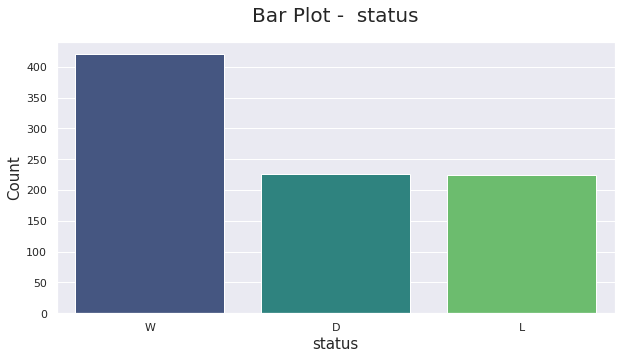

In [286]:
# Status countplot
CatPlots('status', merged)

Wins had the highest frequency. Therefore, there is a class imbalance between the wins, and the draws and losses.

##### Numerical

In [287]:
# Function that determines the measures of central tendency.
def MeasureCentral(measure, columns, data):
  for column in columns:
    if measure == 'mean':
      print(f"{column} column mean = {data[column].mean()}")
    elif measure == 'median':
      print(f"{column} column median = {data[column].median()}")
    elif measure == 'mode':
      print(f"{column} column mode = {data[column].mode()}")

In [288]:
# Function used to determine the measures of distribution.
def MeasureDistribution(measure, columns, data):
  for column in columns:
    if measure == 'range':
      print(f"{column} column range = {data[column].max() - data[column].min()}")
    elif measure == 'IQR':
      Q1 = data[column].quantile(0.25)
      Q3 = data[column].quantile(0.75)
      IQR = Q3 - Q1
      print(f"{column} column IQR = {IQR}")
    elif measure == 'var':
      print(f"{column} column variance = {data[column].var()}")
    elif measure == 'std':
      print(f"{column} column std = {data[column].std()}")
    elif measure == 'skew':
      print(f"{column} column skew = {data[column].skew()}")
    elif measure == 'kurt':
      print(f"{column} column kurt = {data[column].kurt()}")


In [289]:
# Distribution and Boxplot functions
def NumericalPlots(column, data1, data2):
  fig, ax = plt.subplots(2,2, figsize = (12,10))
  # Outliers
  # Distribution plot
  sns.distplot(data1[column], hist=True, ax=ax[0,0], color = 'green')
  ax[0,0].set_title('Outliers: Freq dist '+ column, fontsize=10)
  ax[0,0].set_xlabel(column, fontsize=8)
  ax[0,0].set_ylabel('Count', fontsize=8)
  # Box plot
  sns.boxplot(y = data1[column], ax = ax[0,1], color = 'green')
  ax[0,1].set_title(f'Outliers: Box Plot - {column}')
  ax[0,1].set_xlabel(column)

  # No outliers
  # Distribution plot
  sns.distplot(data2[column], hist=True, ax=ax[1,0], color = 'green')
  ax[1,0].set_title('No outliers: Freq dist '+ column, fontsize=10)
  ax[1,0].set_xlabel(column, fontsize=8)
  ax[1,0].set_ylabel('Count', fontsize=8)
  # Box plot
  sns.boxplot(y = data2[column], ax = ax[1,1], color = 'green')
  ax[1,1].set_title(f'No outliers: Box Plot - {column}')
  ax[1,1].set_xlabel(column)
  plt.show()

In [290]:
# Mean
MeasureCentral('mean', numerical, merged)

home_score column mean = 1.632606199770379
away_score column mean = 1.0045924225028702
home_team_rank column mean = 65.54994259471871
away_team_rank column mean = 69.91848450057405


In [291]:
# Median
MeasureCentral('median', numerical, merged)

home_score column median = 1.0
away_score column median = 1.0
home_team_rank column median = 58.0
away_team_rank column median = 61.0


The mean is greater than the median for all columns, therefore, the distributions are positively skewed.

In [292]:
# Mode
MeasureCentral('mode', numerical, merged)

home_score column mode = 0    1
dtype: int64
away_score column mode = 0    0
dtype: int64
home_team_rank column mode = 0    33
dtype: int64
away_team_rank column mode = 0    20
1    30
2    36
dtype: int64


1. Most home teams scored 0 or 1 goals
2. Most away teams did not score during matches.
3. The most common home rank is 33.
4. The most common away rank is 20.

In [293]:
# Range
MeasureDistribution('range', numerical, merged)

home_score column range = 31
away_score column range = 9
home_team_rank column range = 205
away_team_rank column range = 208


In [294]:
# IQR
MeasureDistribution('IQR', numerical, merged)

home_score column IQR = 2.0
away_score column IQR = 2.0
home_team_rank column IQR = 68.0
away_team_rank column IQR = 74.5


The home team rank and the away team rank have the largest ranges.

In [295]:
# Variance
MeasureDistribution('var', numerical, merged)

home_score column variance = 3.632682740145451
away_score column variance = 1.3333122187471238
home_team_rank column variance = 2261.7627327553205
away_team_rank column variance = 2550.0128878155638


In [296]:
# Standard Deviation
MeasureDistribution('std', numerical, merged)

home_score column std = 1.9059597949971168
away_score column std = 1.1546913954590308
home_team_rank column std = 47.55799336342231
away_team_rank column std = 50.497652300038304


The home team and away team ranks have the highest standard deviations.

In [297]:
# Skew
MeasureDistribution('skew', numerical, merged)

home_score column skew = 5.524378027487251
away_score column skew = 1.74656856137909
home_team_rank column skew = 0.7530868154235779
away_team_rank column skew = 0.6669445275319614


All columns have a positive skew, however, it is most significant in the home scores column. The home team and away team ranks have close to normal distributions.

In [298]:
# Kurtosis
MeasureDistribution('kurt', numerical, merged)

home_score column kurt = 68.55786471188763
away_score column kurt = 5.240328362114057
home_team_rank column kurt = -0.1488295399350119
away_team_rank column kurt = -0.36177849504210124


1. The home and away scores are leptokurtic, with the home score having a higher peak.
2. The home and away ranks are platykutic, however, the kurtosis values are close to zero, therefore, close to being mesokurtic. 

In [299]:
# Viewing outliers
outliers(merged)

Number of outliers = 32
Percentage = 3.6739380022962114%


The analysis will focus on common events, therefore, outliers will be removed. They also only form 3.6739% of the dataset, therefore, removing them will not greaty affect the analysis.

In [301]:
# Copy of orinial dataset
merged_with_outliers = merged.copy()
merged_with_outliers.shape

(871, 11)

In [302]:
# Removing outliers 
Q1 = merged[numerical].quantile(0.25)
Q3 = merged[numerical].quantile(0.75)
IQR = Q3 - Q1
merged =  merged[~ ((merged[numerical]< (Q1 - 1.5 * IQR)) |(merged[numerical] > (Q3 + 1.5 * IQR))).any(axis=1)]
merged.shape

(839, 11)

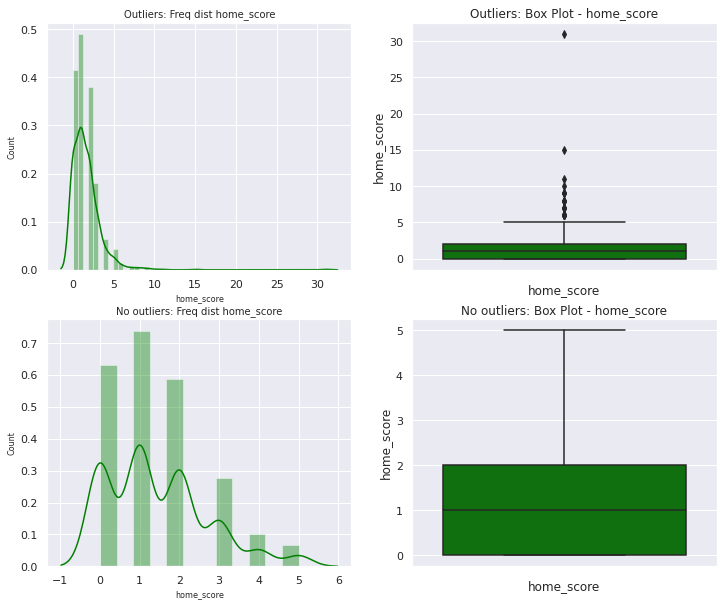

In [305]:
# Home score distribution and box plots before and after outliers are removed.
NumericalPlots(numerical[0], merged_with_outliers, merged)

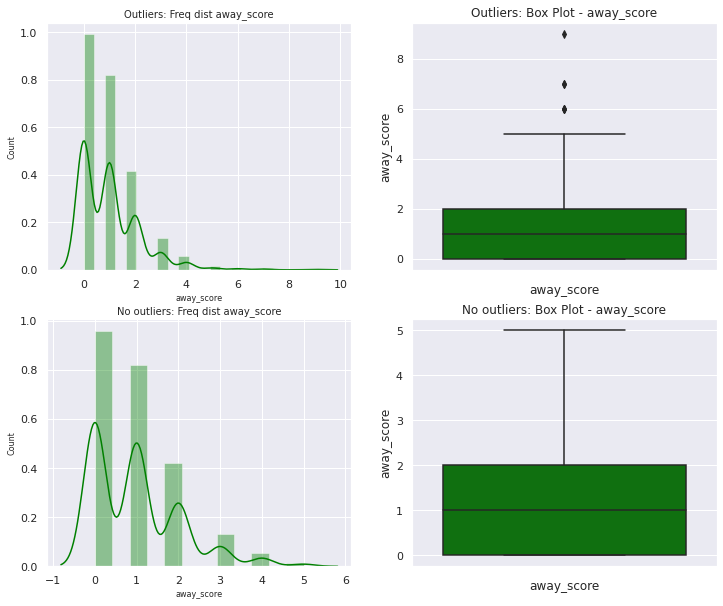

In [307]:
# Away score distribution and box plots before and after outliers are removed.
NumericalPlots(numerical[1], merged_with_outliers, merged)

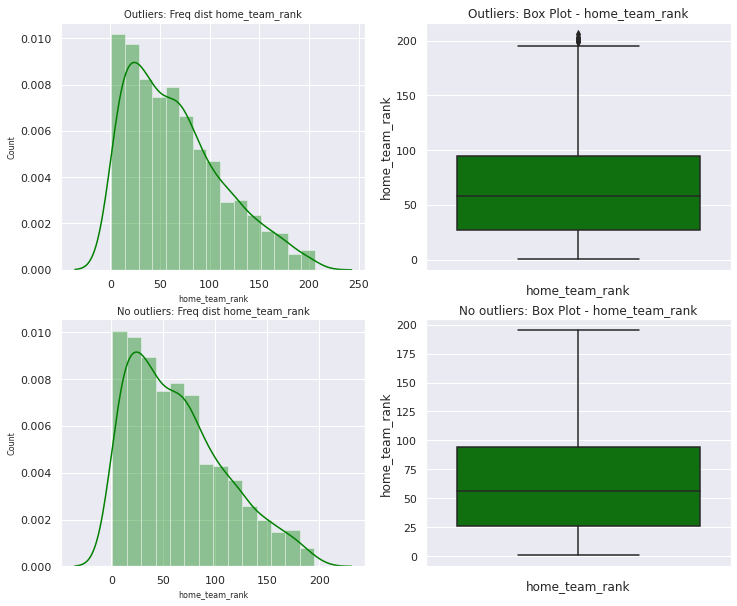

In [309]:
# Home team rank distribution and box plots before and after outliers are removed.
NumericalPlots(numerical[2], merged_with_outliers, merged)

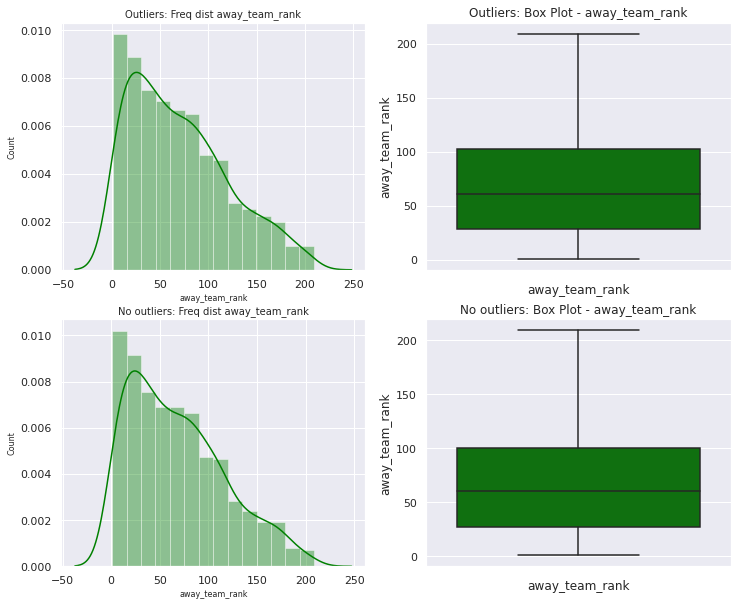

In [311]:
# Away team rank distribution and box plots before and after outliers are removed.
NumericalPlots(numerical[3], merged_with_outliers, merged)

In [584]:
numerical

['home_score',
 'away_score',
 'home_team_rank',
 'away_team_rank',
 'year',
 'month',
 'day']

#### b) Bivariate Analysis

##### Categorical-Categorical columns

In [505]:
# Function used to generate a crosstab before plotting a stacked bar chart.
def CrosstabPlot(x, y, data):  
  table = pd.crosstab(data[x], data[y])
  table.plot.bar(stacked = True, figsize = (30,5), color = ['g', 'b'])
  plt.title(f'{x} Vs {y}', y = 1.05, fontsize = 12)
  plt.xticks(rotation = 0)
  plt.xlabel(x, fontsize = 10)
  plt.ylabel(y, fontsize = 10)

##### Numerical-Numerical Columns

In [506]:
# Pearson Correlation
def Corr(x,y,data):
  corr = data[[x,y]].corr()
  print(f'Correlation Matrix : \n{corr}')

In [507]:
# Numerical-numerical plots
def LineScatterPlots(x, y, data):
  fig, ax = plt.subplots(figsize = (15, 5))
  # sns.scatterplot(data[x], data[y], ax = ax[0], color = 'green')
  # ax[0].set_title(f'Scatter Plot: {x} - {y}', y = 1.05)
  sns.lineplot(data[x], data[y], color = 'green', marker='o', ci=None)
  plt.title(f'Line Plot: {x} - {y}', y = 1.05)
  plt.show()
  correlation = Corr(x, y, data)  

In [508]:
# Numerical columns
numerical

['home_score', 'away_score', 'home_team_rank', 'away_team_rank']

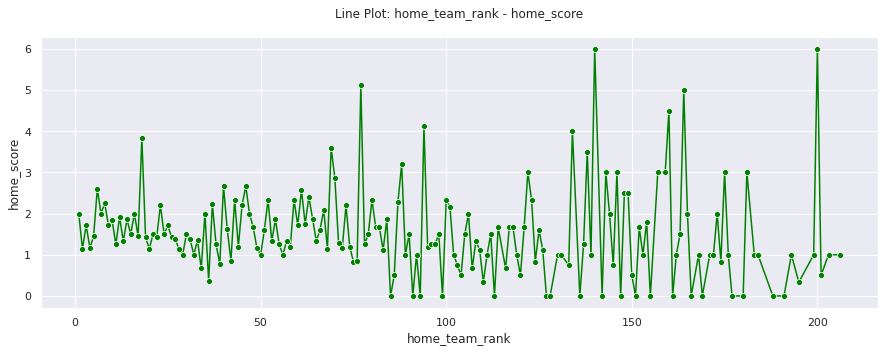

Correlation Matrix : 
                home_team_rank  home_score
home_team_rank        1.000000   -0.043381
home_score           -0.043381    1.000000


In [509]:
# Home team score vs rank
LineScatterPlots(numerical[2], numerical[0], merged)

Correlation between the home score and home team rank have very weak negative correlation to each other.

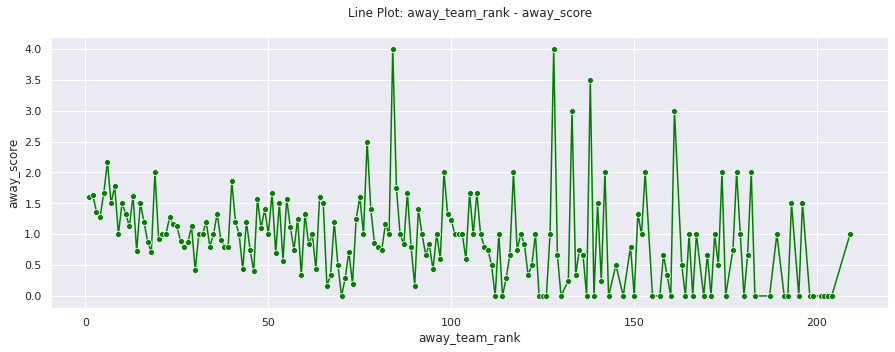

Correlation Matrix : 
                away_team_rank  away_score
away_team_rank        1.000000   -0.151524
away_score           -0.151524    1.000000


In [510]:
# Away team score vs rank
LineScatterPlots(numerical[3], numerical[1], merged)

Correlation between the away score and away team rank have very weak negative correlation to each other.

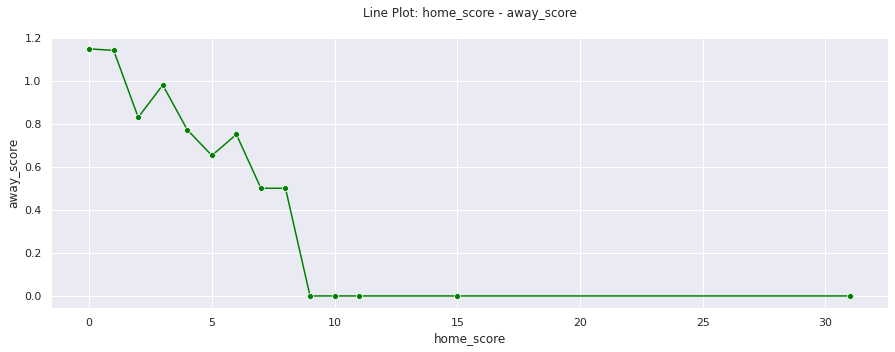

Correlation Matrix : 
            home_score  away_score
home_score    1.000000   -0.132413
away_score   -0.132413    1.000000


In [511]:
# Home team score vs away team score
LineScatterPlots(numerical[0], numerical[1], merged)

The correlation between the home team score and the away team score in very weak and negative.

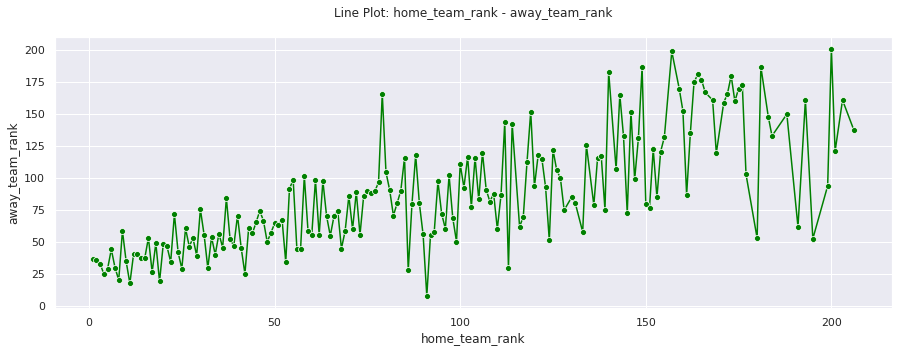

Correlation Matrix : 
                home_team_rank  away_team_rank
home_team_rank        1.000000        0.534618
away_team_rank        0.534618        1.000000


In [512]:
# Home team rank vs away team rank
LineScatterPlots(numerical[2], numerical[3], merged)

The correlation between the home team and away team ranks are moderately strong and positive.

##### Numerical-Categorical

In [513]:
# Bar plot function
def BarPlotBiv(x,y, data):
  fig, ax = plt.subplots(figsize = (8,5))
  sns.barplot(data[x], data[y], palette = 'viridis')
  plt.title(f'{x} Distribution by {y}'
  , fontsize = 12, y = 1.05)
  plt.show()

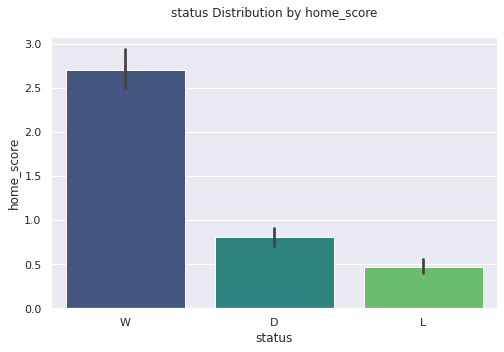

In [514]:
# Home score vs status
BarPlotBiv('status', 'home_score', merged)

Most home scores led to wins, with the least being losses. Therefore, teams seem to be performing better in their home stadiums.

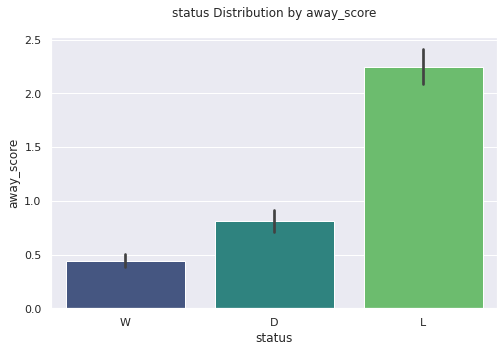

In [515]:
# Away score vs status
BarPlotBiv('status', 'away_score', merged)

Opposite to the previous observations, most teams suffer losses when playing in foreign stadiums.

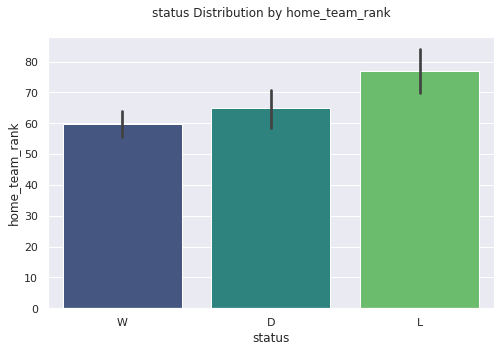

In [516]:
# Home team rank vs status
BarPlotBiv('status', 'home_team_rank', merged)

Home teams with high losses have lower ranks.

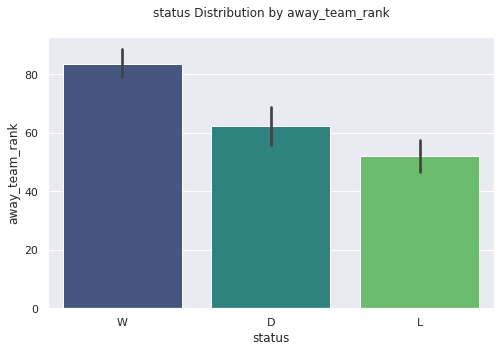

In [517]:
# Home team rank vs status
BarPlotBiv('status', 'away_team_rank', merged)

For away teams, the lower the rank the higher the number of wins.

#### Encoding Categorical Columns

In [518]:
# Checking unique categories
for cat in nominal:
  print(f'{cat}: {len(merged[cat].unique())}')

home_team: 160
away_team: 159
tournament: 38
status: 3


All columns are nominal. Due to the large number of categories, dictvecorizer will be used.

In [519]:
# Feature engineering
merged_modelling = merged.copy()
# Seperating the date column
merged_modelling['year'] = merged_modelling.date.dt.year
merged_modelling['month'] = merged_modelling.date.dt.month
merged_modelling['day'] = merged_modelling.date.dt.day

In [520]:
# Checking changes
merged_modelling.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,status,home_team_continent,away_team_continent,year,month,day
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,22,W,South America,South America,1993,8,8
1,1993-08-08,Brazil,Mexico,1,1,Friendly,8,14,D,South America,North America,1993,8,8
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,35,94,W,South America,South America,1993,8,8
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,65,86,W,Africa,Africa,1993,8,8
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,67,5,L,South America,South America,1993,8,8


In [521]:
# Dropping the date column
merged_modelling.drop('date', axis = 1, inplace = True)

#### Multicollinearity Check

In [522]:
# VIF function
def VIF(data):
  # Correlation matrix
  correlation = data.corr()
  # Inverse matrix
  inv_corr = pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)
  return inv_corr

# Function call
VIF(merged_modelling)

,home_score,away_score,home_team_rank,away_team_rank,year,month,day
home_score,1.197164,0.030440,0.329825,-0.565162,0.120174,0.023560,0.052957
away_score,0.030440,1.105830,-0.345475,0.335002,0.053248,-0.012586,0.042772
home_team_rank,0.329825,-0.345475,1.632361,-1.004466,-0.135974,0.116797,-0.108126
away_team_rank,-0.565162,0.335002,-1.004466,1.835992,-0.232496,-0.061244,0.080826
year,0.120174,0.053248,-0.135974,-0.232496,1.422679,-0.009013,0.664513
month,0.023560,-0.012586,0.116797,-0.061244,-0.009013,1.024437,-0.132835
day,0.052957,0.042772,-0.108126,0.080826,0.664513,-0.132835,1.353072


All VIFs are lower than 5, therefore, multicollinearity is not an issue.

### Modelling

In [523]:
categorical = list(merged_modelling.select_dtypes(include = 'object').columns)
for cat in categorical:
  print(f'{cat}: {len(merged_modelling[cat].unique())}')

home_team: 160
away_team: 159
tournament: 38
status: 3
home_team_continent: 7
away_team_continent: 7


In [524]:
numerical = list(merged_modelling.select_dtypes(exclude = 'object').columns)
numerical

['home_score',
 'away_score',
 'home_team_rank',
 'away_team_rank',
 'year',
 'month',
 'day']

In [525]:
# Label encoding
merged_modelling[categorical] = merged_modelling[categorical].apply(LabelEncoder().fit_transform)
merged_modelling.head()

,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,status,home_team_continent,away_team_continent,year,month,day
0,20,150,3,1,16,59,22,2,6,6,1993,8,8
1,23,90,1,1,17,8,14,0,6,4,1993,8,8
2,40,153,5,0,16,35,94,2,6,6,1993,8,8
3,59,125,1,0,17,65,86,2,1,1,1993,8,8
4,111,7,1,3,16,67,5,1,6,6,1993,8,8


#### Polynomial Regression

In [526]:
def Lda(degree, X_train, X_test, y_train, y_test, components = None):
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  lda = LDA(n_components= components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  print(f'RMSE: {Polynomial(degree, X_train, X_test, y_train, y_test)}')


In [527]:
def Lda_noscale(degree, X_train, X_test, y_train, y_test, components = None):
  lda = LDA(n_components= components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  print(f'RMSE: {Polynomial(degree, X_train, X_test, y_train, y_test)}')

In [528]:
def Residuals_Heteroskedasticity_LDA(degree, X_train, X_test, y_train, y_test, components = None):
  # LDA
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  lda = LDA(n_components= components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  # Polynomial regression
  polynomial = PolynomialFeatures(degree = degree)
  X_train_poly = polynomial.fit_transform(X_train)
  X_test_poly =  polynomial.transform(X_test)
  # Regression
  poly_reg = LinearRegression()
  poly_reg.fit(X_train_poly, y_train)
  # Predictions
  y_pred_poly = poly_reg.predict(X_test_poly)
  # Obtaining ID arrays
  ypred = y_pred_poly.flatten()
  ytest = y_test.flatten()
  # Residuals
  residuals = np.subtract(ypred, ytest)
  print('Residuals Description')
  print(pd.DataFrame(residuals).describe())
  mean = residuals.mean()
  print(f'\nResiduals mean: {mean}')
  
  # Residual plot
  plt.scatter(ypred, residuals, color='black')
  plt.ylabel('Residuals')
  plt.xlabel('Fitted Values')
  plt.axhline(y= mean, color='red', linewidth=1)
  plt.show()

  # Bartlett's test
  test_statistic, p_value = bartlett(ypred, residuals)
  print(f'\nP_Vlaue = {p_value}')
  print(f'test_statistic = {test_statistic}')

  # Degrees of freedom
  df = len(ypred - 1)
  probability = 1 - p_value
  # Critical value
  critical_value = chi2.ppf(probability, df)
  print(f'Critical Value: {critical_value}')
  if (p_value < 0.05) and (test_statistic > critical_value ):
    print('Variances are unequal')
  else:
    print('Variances are equal')

In [529]:
def Residuals_Heteroskedasticity(degree, X_train, X_test, y_train, y_test, components = None):
  # Scaling
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  # Polynomial regression
  polynomial = PolynomialFeatures(degree = degree)
  X_train_poly = polynomial.fit_transform(X_train)
  X_test_poly =  polynomial.transform(X_test)
  # Regression
  poly_reg = LinearRegression()
  poly_reg.fit(X_train_poly, y_train)
  # Predictions
  y_pred_poly = poly_reg.predict(X_test_poly)
  # Obtaining ID arrays
  ypred = y_pred_poly.flatten()
  ytest = y_test.flatten()
  # Residuals
  residuals = np.subtract(ypred, ytest)
  print('Residuals Description')
  print(pd.DataFrame(residuals).describe())
  mean = residuals.mean()
  print(f'\nResiduals mean: {mean}')
  
  # Residual plot
  plt.scatter(ypred, residuals, color='black')
  plt.ylabel('Residuals')
  plt.xlabel('Fitted Values')
  plt.axhline(y= mean, color='red', linewidth=1)
  plt.show()

  # Bartlett's test
  test_statistic, p_value = bartlett(ypred, residuals)
  print(f'\nP_Vlaue = {p_value}')
  print(f'test_statistic = {test_statistic}')

  # Degrees of freedom
  df = len(ypred - 1)
  probability = 1 - p_value
  # Critical value
  critical_value = chi2.ppf(probability, df)
  print(f'Critical Value: {critical_value}')
  if (p_value < 0.05) and (test_statistic > critical_value ):
    print('Variances are unequal')
  else:
    print('Variances are equal')

In [530]:
def Polynomial(degrees, X_train, X_test, y_train, y_test):
  # Polynomial regression
  polynomial = PolynomialFeatures(degree = degrees)
  X_train_poly = polynomial.fit_transform(X_train)
  X_test_poly =  polynomial.transform(X_test)
  # Regression
  poly_reg = LinearRegression()
  poly_reg.fit(X_train_poly, y_train)
  # Predictions
  y_pred_poly = poly_reg.predict(X_test_poly)
  # Model accuracy
  rmse_poly = mean_squared_error(y_test, y_pred_poly , squared = False)
  return rmse_poly

In [531]:
def LogisticReg_LDA(X_train, X_test, y_train, y_test, components = None):
  # Scaling
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  # Dimensionality reduction  
  lda = LDA(n_components= components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  # Model fitting
  log_reg = LogisticRegression(multi_class='auto', solver='lbfgs')
  log_reg.fit(X_train, y_train)
  # Prediction
  y_pred = log_reg.predict(X_test)
  # Evaluation
  score = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)
  print(f'Accuracy score: {score}')
  print('\nClassification Report')
  print(report)
  confusion= confusion_matrix(y_test, y_pred)
  print('\nConfusion Matrix')
  print(confusion)

In [532]:
def LogisticReg(X_train, X_test, y_train, y_test):
  # Scaling
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  # Model fitting
  log_reg = LogisticRegression(multi_class='auto', solver='lbfgs')
  log_reg.fit(X_train, y_train)
  # Prediction
  y_pred = log_reg.predict(X_test)
  # Evaluation
  score = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)
  print(f'Accuracy score: {score}')
  print('\nClassification Report')
  confusion= confusion_matrix(y_test, y_pred)
  print('\nConfusion Matrix')
  print(confusion)

**Train-Test Split**

1. Home Team Score Prediction

In [533]:
# Train-test sets
# Home team score prediction
X1 =  merged_modelling.drop('home_score', axis = 1).values
y1 = merged_modelling.home_score.values.reshape(-1, 1)

In [534]:
# Away team score prediction
X2 =  merged_modelling.drop('away_score', axis = 1).values
y2 = merged_modelling.away_score.values.reshape(-1, 1)

In [535]:
# Status prediction
X3 =  merged_modelling.drop('status', axis = 1).values
y3 = merged_modelling.status.values.reshape(-1, 1)

In [536]:
# Normal train-test-split
# Home team score prediction
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [537]:
# Away team score prediction
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [538]:
# Status prediction
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=0)

Polynomial Regression

Home team

In [539]:
# Degree of 1
Polynomial(1, X1_train, X1_test, y1_train, y1_test)

1.1347202637427232

In [540]:
# Degree 2
Polynomial(2, X1_train, X1_test, y1_train, y1_test)

1.2347839400571132

In [541]:
# Degree of 3
Polynomial(3, X1_train, X1_test, y1_train, y1_test)

3.512896667161136

For the home team score prediction set, a polynomial equation whose independent variable is of degree 1 has the lowest RMSE, therefore, the optimal equation is a linear equation.

Away team

In [542]:
# Degree 1
Polynomial(1, X2_train, X2_test, y2_train, y2_test)

1.303121618577686

In [543]:
# Degree 2
Polynomial(2, X2_train, X2_test, y2_train, y2_test)

0.8967489688620169

In [544]:
# Degree 3
Polynomial(3, X2_train, X2_test, y2_train, y2_test)

1.8146176755236965

For the away team score prediction set, a polynomial equation whose independent variable is of degree 2 has the lowest RMSE.

Status

In [545]:
LogisticReg(X3_train, X3_test, y3_train, y3_test)

Accuracy score: 1.0

Classification Report

Confusion Matrix
[[52  0  0]
 [ 0 54  0]
 [ 0  0 69]]


The model achieves a perfect score. This could mean that it is overfitting. Further analysis is required.

Polynomial regression after dimensionality reduction.

In [546]:
# LDA, y = home team score
# Components = None
Lda(1, X1_train, X1_test, y1_train, y1_test)

RMSE: 1.1347202637427214


In [547]:
# LDA, y = home team score
# Components = 1
Lda(1, X1_train, X1_test, y1_train, y1_test, components = 1)

RMSE: 1.1011513298236608


In [548]:
# LDA, y = home team score
# Components = 2
Lda(1, X1_train, X1_test, y1_train, y1_test, components = 2)

RMSE: 1.1319152569881619


y = home team score: (Previous =  RMSE 1.0906928835350536)
1. Number of components = None, RMSE = 1.0907
2. Number of components = 1, RMSE = 1.0766
3. Number of components = 2, RMSE = 1.0859

Therefore, the optimal number of components is 1. Furthermore, scaling the entire dataset and only scaling the numerical columns leads to the same RMSE.

In [549]:
# LDA, y = away team score
# Components = None
Lda(2, X2_train, X2_test, y2_train, y2_test)

RMSE: 1.2312275736495566


In [550]:
# LDA, y = away team score
# Components = 1
Lda(2,X2_train, X2_test, y2_train, y2_test, components = 1)

RMSE: 1.302181430539882


In [551]:
# LDA, y = away team score
# Components = 2
Lda(2, X2_train, X2_test, y2_train, y2_test, components = 2)

RMSE: 1.2629200129166815


In [552]:
# LDA, y = away team score
# Components = 3
Lda(2, X2_train, X2_test, y2_train, y2_test, components = 3)

RMSE: 1.262868574025658


y = away team score: (Previous =  RMSE 0.9435348241871057)
1. Number of components = None, RMSE = 1.3174
2. Number of components = 1, RMSE = 1.2854
3. Number of components = 2, RMSE = 1.2946

Therefore, the optimal number of components is 1. However, the RMSE increses.

In [553]:
# LDA wothout scaling for y = away team score
Lda_noscale(2, X2_train, X2_test, y2_train, y2_test, components = 1)

RMSE: 1.302181430539881


As per the results, LDA led to an increase in RMSE, therefore, it will not be employed.

In [554]:
# y = status
# Components  = None
LogisticReg_LDA(X3_train, X3_test, y3_train, y3_test)

Accuracy score: 0.8628571428571429

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        52
           1       0.91      0.98      0.95        54
           2       0.84      0.91      0.87        69

    accuracy                           0.86       175
   macro avg       0.86      0.86      0.86       175
weighted avg       0.86      0.86      0.86       175


Confusion Matrix
[[35  5 12]
 [ 1 53  0]
 [ 6  0 63]]


In [555]:
# y = status
# Components  = 1
LogisticReg_LDA(X3_train, X3_test, y3_train, y3_test, components = 1)

Accuracy score: 0.7542857142857143

Classification Report
              precision    recall  f1-score   support

           0       0.65      0.42      0.51        52
           1       0.83      0.89      0.86        54
           2       0.75      0.90      0.82        69

    accuracy                           0.75       175
   macro avg       0.74      0.74      0.73       175
weighted avg       0.74      0.75      0.74       175


Confusion Matrix
[[22  9 21]
 [ 6 48  0]
 [ 6  1 62]]


In [556]:
# y = status
# Components  = 2
LogisticReg_LDA(X3_train, X3_test, y3_train, y3_test, components = 2)

Accuracy score: 0.8628571428571429

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        52
           1       0.91      0.98      0.95        54
           2       0.84      0.91      0.87        69

    accuracy                           0.86       175
   macro avg       0.86      0.86      0.86       175
weighted avg       0.86      0.86      0.86       175


Confusion Matrix
[[35  5 12]
 [ 1 53  0]
 [ 6  0 63]]


y = status: 

Highest accuracy = 0.8628571428571429

All components will be considered as using all of them result in higher f1, precision and recall scores for the 3 classes.

**Residuals and Heteroscedasticity**

Residuals Description
                0
count  175.000000
mean     0.181672
std      1.089178
min     -3.496491
25%     -0.547445
50%      0.206193
75%      0.997762
max      2.838180

Residuals mean: 0.18167156418904135


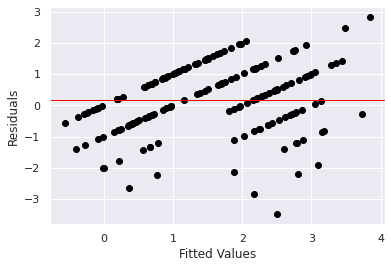


P_Vlaue = 0.6291781152831426
test_statistic = 0.23317694076844514
Critical Value: 168.25202530961363
Variances are equal


In [557]:
# y = home team score
Residuals_Heteroskedasticity_LDA(1, X1_train, X1_test, y1_train, y1_test, 1)

From the Bartlett's test, there is equal variance of the data points as the p-value > 0.05. However, a pattern can be observed.

Residuals Description
                0
count  175.000000
mean     0.172308
std      1.124780
min     -3.681751
25%     -0.454439
50%      0.267009
75%      0.994016
max      3.391629

Residuals mean: 0.1723080745772648


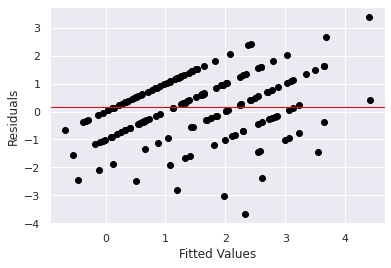


P_Vlaue = 0.6183789051651647
test_statistic = 0.24815259681324614
Critical Value: 168.77120611145472
Variances are equal


In [558]:
# y = away team score
# As the RMSE increased after LDA, the dimensionality reduction method will not be employed.
Residuals_Heteroskedasticity(1, X1_train, X1_test, y1_train, y1_test, 1)

From the Bartlett's test, there is equal variance of the data points as the p-value > 0.05. However, a pattern can be observed.

The patterns in both predictions require further analysis.

For the y = status logistic linear regression, a residual plot will not be generated as differences cannot be calculated for nominal categories, as they have no order, nor quantitative value. 

In [559]:
# Number of records
merged_modelling.shape[0]

871

##### Cross Validation

Employing Leave One Out Cross Validation as the dataset only has around 871 records.

In [560]:
def LeaveOutCV_LDA(X, y, degree, components):
  # KFold object
  folds = LeaveOneOut()
  # Number of models
  model = []
  # List of RMSEs
  RMSES = [] 
  count = 0 
  # Cross Validation
  for train_index, test_index in folds.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # LDA
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    lda = LDA(n_components= components)
    X_train = lda.fit_transform(X_train, y_train)
    X_test = lda.transform(X_test)
    rmse_value = Polynomial(degree, X_train, X_test, y_train, y_test)
    RMSES.append(rmse_value)    
    count = count + 1
  # Number of models and the mean RMSE of all of them.
  print(f'Models = {str(count)}')
  print(f'Mean RMSE = {np.mean(RMSES)}')
  # Plot
  plt.plot(RMSES)
  plt.ylabel('RMSE value')
  plt.xlabel('model ID')
  plt.show()

  

In [561]:
def LeaveOutCV_Logistic_LDA(X, y, components = None):
  # KFold object
  folds = LeaveOneOut()
  # Number of models
  model = []
  # List of RMSEs
  accuracies = []
  f1s = []
  precisions = []
  recalls = []
  count = 0 
  # Cross Validation
  for train_index, test_index in folds.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    # LDA
    lda = LDA(n_components= components)
    X_train = lda.fit_transform(X_train, y_train)
    X_test = lda.transform(X_test)
    # Model fitting
    log_reg = LogisticRegression(multi_class='auto', solver='lbfgs')
    log_reg.fit(X_train, y_train)
    # Prediction
    y_pred = log_reg.predict(X_test)
    # Evaluation
    score = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    precision = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')
    accuracies.append(score)
    f1s.append(f1)
    precisions.append(precision)
    recalls.append(recall)
    report = classification_report(y_test, y_pred)
    model.append(count)
    count += 1
  print(f'Models trained: {len(model)}')
  print('\Classification report for the final model')
  print(report)
  print(f'\nMean Accuracy score: {np.mean(score)}\n')
  print(f'Mean F1 score: {np.mean(f1s)}\n')
  print(f'Mean Precision score: {np.mean(precisions)}\n')



  

In [562]:
def LeaveOutCV(X, y, degree):
  # KFold object
  folds = LeaveOneOut()
  # Number of models
  model = []
  # List of RMSEs
  RMSES = [] 
  count = 0 
  # Cross Validation
  for train_index, test_index in folds.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # LDA
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    rmse_value = Polynomial(degree, X_train, X_test, y_train, y_test)
    RMSES.append(rmse_value)    
    count = count + 1
  # Number of models and the mean RMSE of all of them.
  print(f'Models = {str(count)}')
  print(f'Mean RMSE = {np.mean(RMSES)}')
  # Plot
  plt.plot(RMSES)
  plt.ylabel('RMSE value')
  plt.xlabel('model ID')
  plt.show()

  

Models = 871
Mean RMSE = 0.9791998420250465


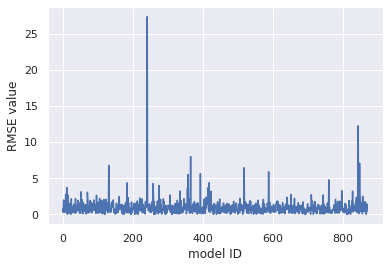

In [563]:
# y = home team score
LeaveOutCV_LDA(X1, y1, 1, 1)

The RMSE has reduced from 1.0766 to 0.9813. An of around 0.9 seems to be the best that can be achieved.

Models = 871
Mean RMSE = 0.5378746152099404


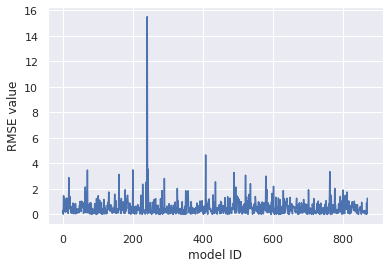

In [564]:
# y = away team score
LeaveOutCV(X2, y2, 2)

The RMSE has reduced from 0.9435 to 0.5391 after LeaveOveOut cross validation.

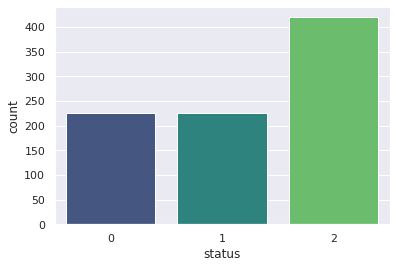

In [565]:
# Checking for class imbalance
sns.countplot(x='status',data= merged_modelling, palette='viridis')

* There is a class imbalance between the draw and loss classes, and the win class. Therefore, weighted averages will be used to compute the F1, precision and recall scores.
*  Accuracy is considered a poor choice for imbalanced datasets as it gives high scores to models which just predict the most frequent class. This could be the reason for the perfect accuracy score of 1.


In [566]:
# y = status
LeaveOutCV_Logistic_LDA(X3, y3)

Models trained: 871
\Classification report for the final model
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Mean Accuracy score: 1.0

Mean F1 score: 0.9173363949483353

Mean Precision score: 0.9173363949483353



All scores have improved.

##### Hyperparameter Tuning

As the LinearRgression model does not have hyperparameters [link](https://www.analyticsvidhya.com/blog/2021/04/evaluating-machine-learning-models-hyperparameter-tuning/) [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), therefore, the Ridge linear regression model will be used.

In [90]:
grid = dict()
grid ['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
grid ['alpha'] = np.arange(0, 1, 0.01)
grid ['fit_intercept'] = [True, False]
grid ['normalize'] = [True, False]

Grid Search

In [181]:
# Grid search function
def Grid_LDA(X, y, params, components, folds):
  # Scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  # LDA
  lda = LDA(n_components= components)
  X = lda.fit_transform(X, y)
  # Model
  model = Ridge()
  # Grid search
  grid = GridSearchCV(model, params, scoring = 'neg_root_mean_squared_error', cv = folds, verbose = 1, n_jobs = -1)
  # Hyperparameter tuning
  grid.fit(X, y)
  # Best parameters
  print(f'Best parameters: {grid.best_params_}')
  # Best scores
  print(f'Best scores: {grid.best_score_}')



In [182]:
# Grid search function
def Grid(X, y, params, folds):
  # Scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  # Model
  model = Ridge()
  # Grid search
  grid = GridSearchCV(model, params, scoring = 'neg_root_mean_squared_error', cv = folds, verbose = 1, n_jobs = -1)
  # Hyperparameter tuning
  grid.fit(X, y)
  # Best parameters
  print(f'Best parameters: {grid.best_params_}')
  # Best scores
  print(f'Best scores: {grid.best_score_}')

In [196]:
# Grid search function
def Grid_Logistic_LDA(X, y, params, folds, components = None):
  # Scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  # LDA
  lda = LDA(n_components= components)
  X = lda.fit_transform(X, y)
  # Model fitting
  model = LogisticRegression(multi_class='auto', solver='lbfgs')
  # Grid search
  # The classes are imbalanced, therefore, f1 weighted score will be used.
  grid = GridSearchCV(model, params, scoring = 'f1_weighted', cv = folds, verbose = 1, n_jobs = -1)
  # Hyperparameter tuning
  grid.fit(X, y)
  # Best parameters
  print(f'Best parameters: {grid.best_params_}')
  # Best scores
  print(f'Best scores: {grid.best_score_}')

In [93]:
# Grid Search
# y = home team score
Grid_LDA(X1, y1, grid, 1)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits
Best parameters: {'alpha': 0.5, 'fit_intercept': True, 'normalize': False, 'solver': 'sag'}
Best scores: -1.4879054756870045


In [94]:
# y = away team score
Grid(X2, y2, grid)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits
Best parameters: {'alpha': 0.03, 'fit_intercept': True, 'normalize': True, 'solver': 'lsqr'}
Best scores: -1.0856042688905734


Ridge regression has a lower performance. However, this could be caused by the low number of folds (10), as compared to the 871 folds used previously. This will not be confirmed as the procedure is computationally expensive. However, Random Forest Regressor will be used to compare the performance of both models.

In [190]:
# Random forest regressor grid search
# Hyperparameters to be tested
rf_grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}




In [197]:
# Random forest regressor grid search
def RSearch_LDA(X, y, params, folds, components):
  # Scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  # LDA
  lda = LDA(n_components= components)
  X = lda.fit_transform(X, y)
  # Regression model
  model = RandomForestRegressor()
  gs_model = RandomizedSearchCV(estimator = model,
                            param_distributions= params,
                            scoring = 'neg_root_mean_squared_error',
                            n_iter=100, 
                            cv= folds, 
                            verbose= 1)
  # Model training
  gs_model.fit(X, y)
  # Best parameters
  print(f'Best parameters: {gs_model.best_params_}')
  # Best scores
  print(f'Best scores: {gs_model.best_score_}')

In [194]:
# Random forest classifier grid search
def RSearch_Logistic_LDA(X, y, params, folds, components = None):
  # Scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  # LDA
  lda = LDA(n_components= components)
  X = lda.fit_transform(X, y)
  # Regression model
  model = RandomForestClassifier()
  gs_model = RandomizedSearchCV(estimator = model,
                            param_distributions= params,
                            scoring = 'f1_weighted',
                            n_iter=100, 
                            cv= folds, 
                            verbose=1)
  # Model training
  gs_model.fit(X, y)
  # Best parameters
  print(f'Best parameters: {gs_model.best_params_}')
  # Best scores
  print(f'Best scores: {gs_model.best_score_}')

In [198]:
# Random forest regressor without LDA
def RSearch(X, y, params):
  # Scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  # Regression model
  model = RandomForestRegressor()
  gs_model = RandomizedSearchCV(estimator = model,
                            param_distributions= params,
                            scoring = 'neg_root_mean_squared_error',
                            n_iter=100,
                            cv=5,
                            verbose= 1)
  # Model training
  gs_model.fit(X, y)
  # Best parameters
  print(f'Best parameters: {gs_model.best_params_}')
  # Best scores
  print(f'Best scores: {gs_model.best_score_}')

In [ ]:
# y = home team score
RSearch_LDA(X1, y1, rf_grid, 1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estim

In [ ]:
# y = away team score
RSearch(X2, y2, rf_grid)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   2.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, 

In [165]:
# y = stautus

# Hyperparameters
logistic_params = dict()
logistic_params['solver'] =  ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
logistic_params['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
logistic_params['C'] = [100, 10, 1.0, 0.1, 0.01]

In [ ]:
# Grid Search
# folds = 2
Grid_Logistic_LDA(X3, y3, folds = 2, params = logistic_params)

In [ ]:
# Grid Search
# folds = 3
Grid_Logistic_LDA(X3, y3, folds = 3, params = logistic_params)

In [188]:
# Grid Search
# folds = 5
Grid_Logistic_LDA(X3, y3, folds = 5, params = logistic_params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
Best scores: 0.9337302720178032


In [187]:
# Grid Search
# folds = 10
Grid_Logistic_LDA(X3, y3, folds = 10, params = logistic_params)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Best scores: 0.932461847467224


In [186]:
# Grid Search
# folds = 200
Grid_Logistic_LDA(X3, y3, folds = 200, params = logistic_params)

Fitting 200 folds for each of 100 candidates, totalling 20000 fits
Best parameters: {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
Best scores: 0.9202250000000001


In [195]:
# Checking the performance with RandomForestClassifier
RSearch_Logistic_LDA(X3, y3, params = rf_grid, folds = 10)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters: {'n_estimators': 10, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 5}
Best scores: 0.9320954410938906


#### Polynomial Regression 2

In [ ]:
# Train-test sets
X = merged_modelling.drop('away_score', axis = 1).values
y = merged_modelling.values.reshape(-1, 1)

## 7. Implementing the Solution

In [ ]:
# Implementing the Solution
# 

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?